In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from tqdm import tqdm
import datetime
from matplotlib import pyplot as plt

%matplotlib inline
%run ./data_loading.ipynb

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5, stride=1, padding=0)

        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(in_features=10*10*12, out_features=300)
        self.fc2 = nn.Linear(in_features=300, out_features=60)
        self.fc3 = nn.Linear(in_features=60, out_features=9)
        
    def forward(self, X):
        X = self.pool(self.relu(self.conv1(X)))
        X = self.pool(self.relu(self.conv2(X)))
        X = X.view(-1, 10*10*12)
        X = self.relu(self.fc1(X))
        X = self.relu(self.fc2(X))
        X = self.fc3(X)
        return X

In [3]:
def calculate_accuracy(dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    return acc

In [4]:
def train(dataset, epochs, batch_size=5, to_cuda=True, calculate_acc=False):
    train_acc = []
    val_acc = []
    if to_cuda:
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
    else:
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in tqdm(enumerate(dataloader, 0)):
            inputs, labels = data
            if to_cuda:
                inputs = inputs.cuda()
                labels = labels.cuda()

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = loss_f(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
        print('epoch:', epoch, ', loss:', running_loss * batch_size / dataloader.__len__())
        if calculate_acc:
            t = calculate_accuracy(dataloader)
            v = calculate_accuracy(val_loader)
            print("train acc:", t, "val acc:", v)
            train_acc.append(t)
            val_acc.append(v)
        if epoch % 1 == 0: # every x epochs reshuffle data by creating a new loader
            if to_cuda:
                dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
            else:
                dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    return train_acc, val_acc

In [5]:
cr_test = ClassroomDataset(range_10=[7,10])
# Dividing data into 50% train, 40% val, 30% test
scores = []
for i in range(2):
    net = Net().float()
    if torch.cuda.is_available():
        net = net.cuda()
    loss_f = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01)
    if i == 0:
        cr_train = ClassroomDataset(range_10=[0,5])
        cr_val = ClassroomDataset(range_10=[5,7])
    else:
        cr_train = ClassroomDataset(range_10=[2,7])
        cr_val = ClassroomDataset(range_10=[0,2])
    val_loader = DataLoader(cr_val, batch_size=1, shuffle=True)
    train_accuracy, val_accuracy = train(cr_train, to_cuda=False, epochs=20, calculate_acc=True)
    print(train_accuracy, val_accuracy)
    scores.append((train_accuracy, val_accuracy))
    p = "weights/" + str(datetime.datetime.now()).split(".")[0].replace(':','_') + ".pth"
    torch.save(net.state_dict(), p)

640it [00:02, 289.10it/s]


epoch: 0 , loss: 7.796854363346938


30it [00:00, 294.01it/s]

train acc: 76.34375 val acc: 75.15625


640it [00:02, 294.49it/s]


epoch: 1 , loss: 3.462324185311445


30it [00:00, 297.70it/s]

train acc: 80.71875 val acc: 78.90625


640it [00:02, 295.32it/s]


epoch: 2 , loss: 2.550169682590422


30it [00:00, 293.83it/s]

train acc: 85.28125 val acc: 84.0625


640it [00:02, 292.81it/s]


epoch: 3 , loss: 2.105872019119488


29it [00:00, 286.23it/s]

train acc: 89.59375 val acc: 86.25


640it [00:02, 285.93it/s]


epoch: 4 , loss: 1.6743495200798861


29it [00:00, 282.58it/s]

train acc: 91.78125 val acc: 88.59375


640it [00:02, 286.35it/s]


epoch: 5 , loss: 1.2818633479493542


29it [00:00, 287.03it/s]

train acc: 93.0 val acc: 88.984375


640it [00:02, 290.55it/s]


epoch: 6 , loss: 0.9628192866255461


30it [00:00, 292.66it/s]

train acc: 94.03125 val acc: 88.828125


640it [00:02, 292.82it/s]


epoch: 7 , loss: 0.8140811804979649


30it [00:00, 292.86it/s]

train acc: 96.03125 val acc: 90.3125


640it [00:02, 291.12it/s]


epoch: 8 , loss: 0.5897311044662228


30it [00:00, 294.16it/s]

train acc: 98.3125 val acc: 91.640625


640it [00:02, 292.79it/s]


epoch: 9 , loss: 0.45338876121302646


30it [00:00, 291.08it/s]

train acc: 97.8125 val acc: 91.5625


640it [00:02, 290.36it/s]


epoch: 10 , loss: 0.38805558064836476


31it [00:00, 300.39it/s]

train acc: 97.9375 val acc: 91.09375


640it [00:02, 293.22it/s]


epoch: 11 , loss: 0.3046067406369888


30it [00:00, 298.18it/s]

train acc: 98.90625 val acc: 91.171875


640it [00:02, 293.08it/s]


epoch: 12 , loss: 0.29451062512668424


30it [00:00, 297.34it/s]

train acc: 99.40625 val acc: 92.8125


640it [00:02, 293.38it/s]


epoch: 13 , loss: 0.3256007905710465


30it [00:00, 298.15it/s]

train acc: 99.09375 val acc: 92.109375


640it [00:02, 291.74it/s]


epoch: 14 , loss: 0.20385213021824633


30it [00:00, 293.71it/s]

train acc: 96.46875 val acc: 88.515625


640it [00:02, 291.86it/s]


epoch: 15 , loss: 0.12733377049388706


30it [00:00, 299.30it/s]

train acc: 97.8125 val acc: 90.625


640it [00:02, 294.52it/s]


epoch: 16 , loss: 0.1525056686923656


31it [00:00, 301.12it/s]

train acc: 99.75 val acc: 92.1875


640it [00:02, 295.05it/s]


epoch: 17 , loss: 0.06505444928811355


30it [00:00, 297.84it/s]

train acc: 99.90625 val acc: 92.65625


640it [00:02, 289.95it/s]


epoch: 18 , loss: 0.033821253565989196


30it [00:00, 295.25it/s]

train acc: 99.96875 val acc: 93.125


640it [00:02, 293.64it/s]


epoch: 19 , loss: 0.02483998079808758
train acc: 99.96875 val acc: 93.203125
[76.34375, 80.71875, 85.28125, 89.59375, 91.78125, 93.0, 94.03125, 96.03125, 98.3125, 97.8125, 97.9375, 98.90625, 99.40625, 99.09375, 96.46875, 97.8125, 99.75, 99.90625, 99.96875, 99.96875] [75.15625, 78.90625, 84.0625, 86.25, 88.59375, 88.984375, 88.828125, 90.3125, 91.640625, 91.5625, 91.09375, 91.171875, 92.8125, 92.109375, 88.515625, 90.625, 92.1875, 92.65625, 93.125, 93.203125]


640it [00:02, 290.12it/s]


epoch: 0 , loss: 10.118011841084808


30it [00:00, 293.65it/s]

train acc: 58.78125 val acc: 59.6875


640it [00:02, 294.72it/s]


epoch: 1 , loss: 4.211040484035038


29it [00:00, 289.97it/s]

train acc: 80.21875 val acc: 80.390625


640it [00:02, 293.24it/s]


epoch: 2 , loss: 2.9441830288851634


29it [00:00, 283.21it/s]

train acc: 83.84375 val acc: 82.109375


640it [00:02, 288.86it/s]


epoch: 3 , loss: 2.3885435256770506


30it [00:00, 292.43it/s]

train acc: 88.6875 val acc: 85.0


640it [00:02, 291.65it/s]


epoch: 4 , loss: 1.8868133991763898


29it [00:00, 287.37it/s]

train acc: 90.375 val acc: 86.640625


640it [00:02, 291.41it/s]


epoch: 5 , loss: 1.5856336629941552


30it [00:00, 291.98it/s]

train acc: 93.125 val acc: 87.890625


640it [00:02, 289.89it/s]


epoch: 6 , loss: 1.2748847217585535


30it [00:00, 294.79it/s]

train acc: 94.53125 val acc: 89.6875


640it [00:02, 291.39it/s]


epoch: 7 , loss: 1.0040342004461564


30it [00:00, 294.11it/s]

train acc: 92.84375 val acc: 86.25


640it [00:02, 290.27it/s]


epoch: 8 , loss: 0.8733739671217222


30it [00:00, 294.17it/s]

train acc: 96.75 val acc: 90.234375


640it [00:02, 293.29it/s]


epoch: 9 , loss: 0.7196549679946713


30it [00:00, 298.20it/s]

train acc: 97.1875 val acc: 90.078125


640it [00:02, 290.63it/s]


epoch: 10 , loss: 0.59983450853768


30it [00:00, 290.89it/s]

train acc: 96.34375 val acc: 90.234375


640it [00:02, 290.92it/s]


epoch: 11 , loss: 0.5003723337021757


30it [00:00, 294.03it/s]

train acc: 96.84375 val acc: 90.703125


640it [00:02, 292.35it/s]


epoch: 12 , loss: 0.3846704487134316


30it [00:00, 295.54it/s]

train acc: 99.0625 val acc: 91.25


640it [00:02, 291.08it/s]


epoch: 13 , loss: 0.21399103053212354


30it [00:00, 295.28it/s]

train acc: 99.53125 val acc: 92.5


640it [00:02, 292.31it/s]


epoch: 14 , loss: 0.2389126918110951


30it [00:00, 294.83it/s]

train acc: 99.21875 val acc: 92.578125


640it [00:02, 291.25it/s]


epoch: 15 , loss: 0.22378469133148404


30it [00:00, 292.55it/s]

train acc: 98.125 val acc: 91.5625


640it [00:02, 291.17it/s]


epoch: 16 , loss: 0.18405989818030144


30it [00:00, 293.84it/s]

train acc: 99.78125 val acc: 92.5


640it [00:02, 291.86it/s]


epoch: 17 , loss: 0.05818941343083073


30it [00:00, 293.58it/s]

train acc: 99.90625 val acc: 92.96875


640it [00:02, 291.17it/s]


epoch: 18 , loss: 0.0440546410834739


30it [00:00, 293.85it/s]

train acc: 99.9375 val acc: 93.203125


640it [00:02, 291.78it/s]


epoch: 19 , loss: 0.0361256614015143
train acc: 97.3125 val acc: 90.703125
[58.78125, 80.21875, 83.84375, 88.6875, 90.375, 93.125, 94.53125, 92.84375, 96.75, 97.1875, 96.34375, 96.84375, 99.0625, 99.53125, 99.21875, 98.125, 99.78125, 99.90625, 99.9375, 97.3125] [59.6875, 80.390625, 82.109375, 85.0, 86.640625, 87.890625, 89.6875, 86.25, 90.234375, 90.078125, 90.234375, 90.703125, 91.25, 92.5, 92.578125, 91.5625, 92.5, 92.96875, 93.203125, 90.703125]


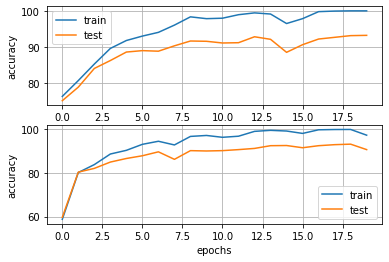

In [12]:
fig = plt.figure()
ax = fig.add_subplot(211)
train_accuracy, val_accuracy = scores[0]

ax.plot(np.arange(len(train_accuracy)), train_accuracy, label="train")
ax.plot(np.arange(len(val_accuracy)), val_accuracy, label="test")
ax.grid()
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
# ax.set_facecolor('lightgray')
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.xaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
ax.legend()

ax = fig.add_subplot(212)
train_accuracy, val_accuracy = scores[1]

ax.plot(np.arange(len(train_accuracy)), train_accuracy, label="train")
ax.plot(np.arange(len(val_accuracy)), val_accuracy, label="test")
ax.grid()
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
# ax.set_facecolor('lightgray')
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.xaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')
ax.legend()

In [7]:
def class_wise_accuracy(dataloader):
    correct = {}
    total = {}
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            for l in range(len(labels)):
                label = int(labels[l].cpu().numpy())
                pred = predicted[l]
                if label in correct:
                    correct[label] += int(pred == label)
                    total[label] += 1
                else:
                    correct[label] = int(pred == label)
                    total[label] = 1
    acc = {}
    for label in correct:
        acc[label] = 100 * correct[label] / total[label]
    return acc

In [8]:
class_wise_accuracy(val_loader)

{3: 90.50632911392405,
 4: 91.61676646706587,
 5: 93.75,
 7: 79.375,
 1: 95.03105590062111,
 8: 86.53846153846153,
 2: 91.77215189873418,
 6: 96.875}